In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

### Datafield descriptions
1) s.no : Simply, the Index!
2) age : Age of the customer.
3) division_name : Division of the Cloth customer has bought
4) department_name : Department of the Cloth
5) class_name : Class of the Cloth in particular.
6) clothing_id : Clothing ID (Unique to a type of product)
7) title : Title customers write on their feedback/review text
8) review_text : Customer's Review Text
9) alikefeedbackcount : Number of other customers who agrees with the given feedback (as their - experience is quite the same)
10) rating : Rating or stars they've given to the product
11) recommend_index : Whether they'll recommend someone to buy the product or not (0: NO, 1:YES)

In [244]:
dataset = pd.read_csv("Women Dresses Reviews Dataset .csv")
dataset.head(10)

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
5,5,43,General,Tops,Sweaters,933,Love the pattern and color,I love this sweater but i'm on the fence about...,0,4,1
6,6,83,General,Tops,Sweaters,937,Beautiful and unique.,Love this sweater!\r\nsoft and cozy and the ru...,4,5,1
7,7,34,General,Tops,Knits,868,Unique and wonderful,The sweater is comfortable and a good weight. ...,2,5,1
8,8,49,General Petite,Tops,Fine gauge,900,Great look all in one,I love everything about this sweater. it is ve...,4,5,1
9,9,49,General,Tops,Knits,873,Beauty meets comfort,"I love this top, the details at the neck and s...",0,5,1


In [245]:
dataset.shape

(23486, 11)

In [246]:
dataset["department_name"].value_counts()

department_name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

In [247]:
dataset.isnull().sum()

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [248]:
# This counts nan as unique value
distinct_count = dataset["department_name"].nunique(dropna=False)
print(distinct_count)

7


In [249]:
# This does not include nans.
distinct_count = dataset["department_name"].nunique()
print(distinct_count)

6


In [250]:
dataset["class_name"].value_counts()

class_name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [251]:
# This counts nan as unique value
distinct_count = dataset["class_name"].nunique(dropna=False)
print(distinct_count)

21


In [252]:
# This does not include nans.
distinct_count = dataset["class_name"].nunique()
print(distinct_count)

20


In [253]:
dataset["class_name"].unique()

array(['Jeans', 'Blouses', 'Skirts', 'Pants', 'Swim', 'Sweaters', 'Knits',
       'Fine gauge', 'Jackets', 'Dresses', 'Shorts', 'Lounge',
       'Outerwear', 'Intimates', 'Legwear', 'Sleep', 'Trend', 'Layering',
       nan, 'Casual bottoms', 'Chemises'], dtype=object)

In [254]:
dataset.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [255]:
# columns = dataset.columns.tolist()
# columns

In [256]:
colnames = dataset.columns
colnames

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index '],
      dtype='object')

In [257]:
df = dataset[['age','alike_feedback_count','rating','recommend_index ']]
df.head(5)

,age,alike_feedback_count,rating,recommend_index
0,40,0,5,1
1,62,12,5,1
2,47,3,1,0
3,45,0,5,1
4,37,0,5,1


In [258]:
df.shape

(23486, 4)

In [259]:
x = df
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.26048296, -0.44473881,  0.72429116,  0.4647678 ],
       [ 1.53115271,  1.65975636,  0.72429116,  0.4647678 ],
       [ 0.30958293,  0.08138498, -2.87928943, -2.15161203],
       ...,
       [-1.1563008 , -0.44473881,  0.72429116,  0.4647678 ],
       [ 1.12396278,  1.30900716,  0.72429116,  0.4647678 ],
       [ 1.0425248 , -0.44473881,  0.72429116,  0.4647678 ]])

In [260]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result   
# wcss

Text(0, 0.5, 'WCSS')

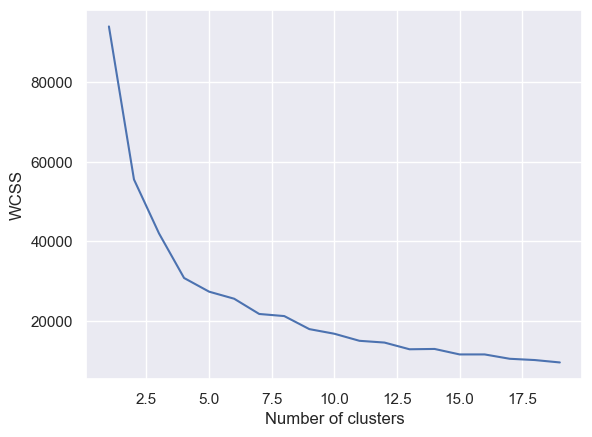

In [261]:
plt.plot(range(1,20),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [262]:
# from scipy.cluster import hierarchy
# dendrogrammi = hierarchy.dendrogram(hierarchy.linkage(x_scaled, method = "ward"))

### Clustering

k-arvolla 4

In [263]:
# base on result cluster size 4 suitable
kmean4 = KMeans(4)
kmean4.fit(x_scaled)
data_with_clusters = df.copy()
data_with_clusters["Clusters4"] = kmean4.fit_predict(x_scaled)

In [264]:
data_with_clusters.head()

,age,alike_feedback_count,rating,recommend_index,Clusters4
0,40,0,5,1,3
1,62,12,5,1,0
2,47,3,1,0,1
3,45,0,5,1,3
4,37,0,5,1,3


In [265]:
# data_with_clusters = data_with_clusters.sample(frac=0.01,random_state=42)

Text(0, 0.5, 'alike_feedback_count')

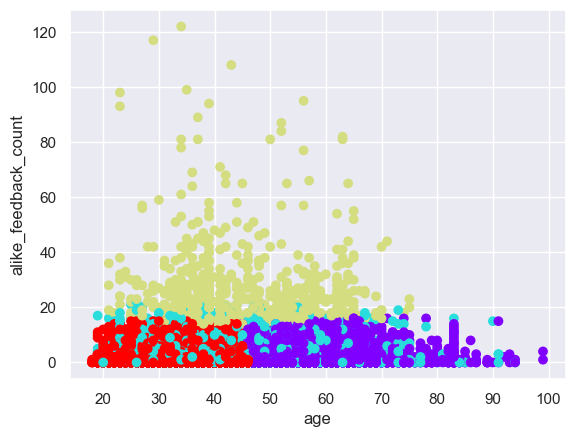

In [266]:
plt.scatter(data_with_clusters["age"],data_with_clusters["alike_feedback_count"],c= data_with_clusters["Clusters4"],cmap= "rainbow")
plt.xlabel("age")
plt.ylabel("alike_feedback_count")

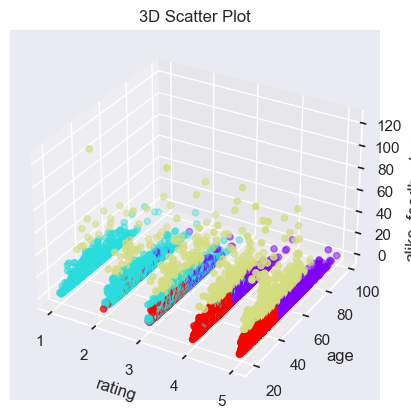

In [267]:
# Generate sample 3D data using make_blobs
X= data_with_clusters[['age','alike_feedback_count','rating']]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X['rating'],X['age'], X['alike_feedback_count'], c= data_with_clusters["Clusters4"], marker='o',cmap= "rainbow")

# Set labels and title
ax.set_xlabel('rating')
ax.set_ylabel('age')
ax.set_zlabel('alike_feedback_count')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()

In [268]:
data_with_clusters["Clusters4"].value_counts()

Clusters4
3    11837
0     6929
1     4054
2      666
Name: count, dtype: int64

k-arvolla 6

In [269]:
# base on result cluster size 4 suitable
kmean6 = KMeans(6)
kmean6.fit(x_scaled)
data_with_clusters["Clusters6"] = kmean6.fit_predict(x_scaled)

In [270]:
data_with_clusters["Clusters6"].value_counts()

Clusters6
1    7634
3    6747
0    4452
5    3637
4     529
2     487
Name: count, dtype: int64

In [271]:
data_with_clusters.head()

,age,alike_feedback_count,rating,recommend_index,Clusters4,Clusters6
0,40,0,5,1,3,1
1,62,12,5,1,0,0
2,47,3,1,0,1,5
3,45,0,5,1,3,1
4,37,0,5,1,3,3


Better distribution with 4 clusters. Having 6 did not split the biggest cluster, so it did not help.

### Analyzing 4 clusters version

0) Cluster: ka ikä 42 v, min 19 ja max 94 / 25% 34, 50% 40, 75% 49 / rating ka 2.3, min 1 ja max 5, 25% 2, 50% 2, 74% 3 / recommended index ka 0.00 
--- Kriittiset keski-ikäiset 4.055 kpl > alike_feedback_count ka 2.54

1) Cluster: ka ikä 56 v, min 45 ja max 99 / 25% 49, 50% 55, 75% 61 / rating ka 4.6, min 1 ja max 5, 25% 4, 50% 5, 74% 5 / recommended index ka 0.99
--- Vanhimmat ja positiiviset 7.365 kpl > alike_feedback_count ka 1.86

2) Cluster: ka ikä 45 v, min 21 ja max 75 / 25% 36, 50% 44, 75% 55 / rating ka 4.2, min 1 ja max 5, 25% 4, 50% 5, 74% 5 / recommended index ka 0.82
--- Keski-ikäiset realistiset 666 kpl > alike_feedback_count ka 27.1 > todella samanmielisiä

3) Cluster: ka ikä 35 v, min 18 ja max 45 / 25% 31, 50% 36, 75% 40 / rating ka 4.6, min 2 ja max 5, 25% 4, 50% 5, 74% 5 / recommended index ka 0.99
--- Nuoret ja positiiviset 11.400 kpl > alike_feedback_count ka 1.54

In [272]:
cluster_0 =data_with_clusters[data_with_clusters["Clusters4"]==0]
cluster_0.describe()

,age,alike_feedback_count,rating,recommend_index,Clusters4,Clusters6
count,6929.000000,6929.000000,6929.000000,6929.000000,6929.0,6929.000000
mean,56.724924,1.929138,4.624621,0.998701,0.0,0.362246
std,7.807955,2.939493,0.621571,0.036019,0.0,0.480684
min,45.000000,0.000000,1.000000,0.000000,0.0,0.000000
25%,50.000000,0.000000,4.000000,1.000000,0.0,0.000000
50%,55.000000,1.000000,5.000000,1.000000,0.0,0.000000
75%,62.000000,3.000000,5.000000,1.000000,0.0,1.000000
max,99.000000,16.000000,5.000000,1.000000,0.0,1.000000


Cluster 1
ka ikä 56 v, min 45 ja max 99 / 25% 49, 50% 55, 75% 61 / rating ka 4.6, min 1 ja max 5, 25% 4, 50% 5, 74% 5 / recommended index ka 0.99

In [273]:
cluster_1 =data_with_clusters[data_with_clusters["Clusters4"]==1]
cluster_1.describe()

,age,alike_feedback_count,rating,recommend_index,Clusters4,Clusters6
count,4054.000000,4054.000000,4054.000000,4054.000000,4054.0,4054.000000
mean,42.283917,2.537987,2.285644,0.003207,1.0,4.690429
std,11.713984,3.841148,0.841383,0.056544,0.0,0.915433
min,19.000000,0.000000,1.000000,0.000000,1.0,0.000000
25%,34.000000,0.000000,2.000000,0.000000,1.0,5.000000
50%,40.000000,1.000000,2.000000,0.000000,1.0,5.000000
75%,49.000000,3.000000,3.000000,0.000000,1.0,5.000000
max,94.000000,22.000000,5.000000,1.000000,1.0,5.000000


Cluster 2
ka ikä 45 v, min 21 ja max 75 / 25% 36, 50% 44, 75% 55 / rating ka 4.2, min 1 ja max 5, 25% 4, 50% 5, 74% 5 / recommended index ka 0.82

In [274]:
cluster_2 =data_with_clusters[data_with_clusters["Clusters4"]==2]
cluster_2.describe()

,age,alike_feedback_count,rating,recommend_index,Clusters4,Clusters6
count,666.000000,666.000000,666.000000,666.000000,666.0,666.000000
mean,45.379880,27.018018,4.166667,0.821321,2.0,3.453453
std,11.491147,15.054876,1.046656,0.383371,0.0,1.143177
min,21.000000,14.000000,1.000000,0.000000,2.0,0.000000
25%,36.000000,18.000000,4.000000,1.000000,2.0,4.000000
50%,44.000000,22.000000,5.000000,1.000000,2.0,4.000000
75%,55.000000,30.000000,5.000000,1.000000,2.0,4.000000
max,75.000000,122.000000,5.000000,1.000000,2.0,4.000000


Cluster 3
ka ikä 35 v, min 18 ja max 45 / 25% 31, 50% 36, 75% 40 / rating ka 4.6, min 2 ja max 5, 25% 4, 50% 5, 74% 5 / recommended index ka 0.99

In [275]:
cluster_3 =data_with_clusters[data_with_clusters["Clusters4"]==3]
cluster_3.describe()

,age,alike_feedback_count,rating,recommend_index,Clusters4,Clusters6
count,11837.000000,11837.000000,11837.000000,11837.000000,11837.0,11837.000000
mean,35.471150,1.512968,4.601081,0.999747,3.0,2.139478
std,6.459086,2.585367,0.626948,0.015919,0.0,0.990182
min,18.000000,0.000000,2.000000,0.000000,3.0,1.000000
25%,31.000000,0.000000,4.000000,1.000000,3.0,1.000000
50%,36.000000,0.000000,5.000000,1.000000,3.0,3.000000
75%,40.000000,2.000000,5.000000,1.000000,3.0,3.000000
max,46.000000,15.000000,5.000000,1.000000,3.0,3.000000


### Mukaan myös tuotteesta jotain

Ei toiminut kovin hyvin. Näyttää vaativan valtavan määrän ryhmiä.

In [276]:
exclude_classes = ['Casual bottoms', 'Chemises']

# Filter out the rows with the specified class_names
df_filtered = dataset[~dataset['class_name'].isin(exclude_classes)]

print(df_filtered)

        s.no  age   division_name department_name class_name  clothing_id  \
0          0   40         General         Bottoms      Jeans         1028   
1          1   62  General Petite            Tops    Blouses          850   
2          2   47  General Petite         Bottoms     Skirts          993   
3          3   45  General Petite         Bottoms      Pants         1068   
4          4   37       Initmates        Intimate       Swim           24   
...      ...  ...             ...             ...        ...          ...   
23481  23481   44  General Petite         Dresses    Dresses         1081   
23482  23482   39         General         Dresses    Dresses         1110   
23483  23483   29  General Petite            Tops      Knits          862   
23484  23484   57         General         Dresses    Dresses         1082   
23485  23485   56         General         Jackets    Jackets          984   

                                       title  \
0                       Ama

In [277]:
# One-hot encode the `class_name` column
binary_columns = pd.get_dummies(df_filtered['class_name'], prefix='', prefix_sep='')

# Add the new binary columns to the original DataFrame
dataset2 = pd.concat([df_filtered, binary_columns], axis=1)


In [278]:
dataset2.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,...,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,...,False,False,False,False,False,False,False,False,False,False
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,...,False,False,False,False,False,False,False,False,False,False
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,...,False,False,False,False,False,True,False,False,False,False
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,...,False,False,False,True,False,False,False,False,False,False
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,...,False,False,False,False,False,False,False,False,True,False


In [279]:
columns = dataset2.columns
columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'title', 'review_text', 'alike_feedback_count', 'rating',
       'recommend_index ', 'Blouses', 'Dresses', 'Fine gauge', 'Intimates',
       'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear', 'Lounge',
       'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep', 'Sweaters', 'Swim',
       'Trend'],
      dtype='object')

In [280]:
df2 = dataset2[['age','alike_feedback_count','rating','recommend_index ','Blouses', 'Dresses',
       'Fine gauge', 'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering',
       'Legwear', 'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep',
       'Sweaters', 'Swim', 'Trend']]
df2.head(5)

,age,alike_feedback_count,rating,recommend_index,Blouses,Dresses,Fine gauge,Intimates,Jackets,Jeans,...,Legwear,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend
0,40,0,5,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,62,12,5,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,47,3,1,0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,45,0,5,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,37,0,5,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [281]:
x2 = df2
x2_scaled = preprocessing.scale(x2)
x2_scaled

array([[-0.2606217 , -0.44477283,  0.72426975, ..., -0.25445476,
        -0.12300366, -0.0713674 ],
       [ 1.5310476 ,  1.6596145 ,  0.72426975, ..., -0.25445476,
        -0.12300366, -0.0713674 ],
       [ 0.30945489,  0.081324  , -2.87912571, ..., -0.25445476,
        -0.12300366, -0.0713674 ],
       ...,
       [-1.15645636, -0.44477283,  0.72426975, ..., -0.25445476,
        -0.12300366, -0.0713674 ],
       [ 1.12385003,  1.30888328,  0.72426975, ..., -0.25445476,
        -0.12300366, -0.0713674 ],
       [ 1.04241052, -0.44477283,  0.72426975, ..., -0.25445476,
        -0.12300366, -0.0713674 ]])

In [282]:
wcss2 = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(x2_scaled)
    # Append the WCSS for the iteration
    wcss2.append(kmeans.inertia_)
    

Text(0, 0.5, 'WCSS')

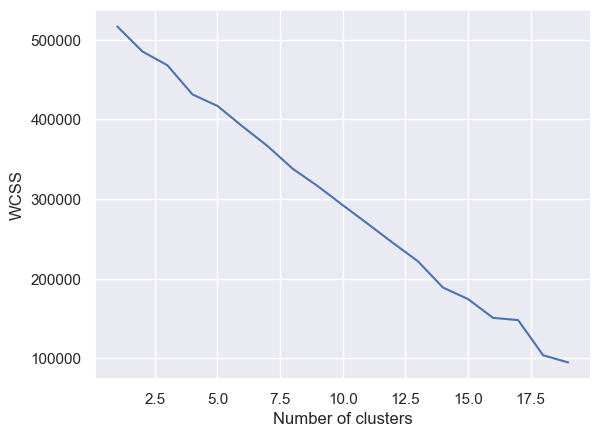

In [283]:
plt.plot(range(1,20),wcss2)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [284]:
# from scipy.cluster import hierarchy
# dendrogrammi = hierarchy.dendrogram(hierarchy.linkage(x2_scaled, method = "ward"))

In [285]:
# base on result cluster size 4 suitable
kmean4 = KMeans(4)
kmean4.fit(x2_scaled)
data_with_clusters2 = df2.copy()
data_with_clusters2["Clusters42"] = kmean4.fit_predict(x2_scaled)

In [286]:
data_with_clusters2.head()

,age,alike_feedback_count,rating,recommend_index,Blouses,Dresses,Fine gauge,Intimates,Jackets,Jeans,...,Lounge,Outerwear,Pants,Shorts,Skirts,Sleep,Sweaters,Swim,Trend,Clusters42
0,40,0,5,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2
1,62,12,5,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,47,3,1,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
3,45,0,5,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,2
4,37,0,5,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2


In [287]:
data_with_clusters2["Clusters42"].value_counts()

Clusters42
2    12789
1     8938
3     1428
0      328
Name: count, dtype: int64

In [288]:
# base on result cluster size 10 suitable
kmean4 = KMeans(10)
kmean4.fit(x2_scaled)
data_with_clusters2 = df2.copy()
data_with_clusters2["Clusters102"] = kmean4.fit_predict(x2_scaled)

In [289]:
data_with_clusters2["Clusters102"].value_counts()

Clusters102
2    7255
6    6304
3    2982
1    1635
0    1525
4    1388
7    1147
5     691
9     328
8     228
Name: count, dtype: int64